In [2]:
def calculate_complexity_attn(E, k, H, D, d, N):
    # 计算各个部分
    part1 = 3 * N * D * H * d  # O(3NDHd)
    part2 = H * N**2 * d        # O(HN^2d)
    part3 = H * N**2 * d        # O(HN^2d)
    part4 = N * H * d * D       # O(NHdD)

    # 总复杂度
    total_complexity = part1 + part2 + part3 + part4
    return total_complexity

def calculate_complexity_mlp(E, k, H, D, d, N):
    # 计算各个部分
    part1 = 8 * N * D * D  # O(8ND^2)

    # 总复杂度
    total_complexity = part1
    return total_complexity

def calculate_complexity_moha(E, k, H, D, d, N):
    # 计算各个部分
    part1 = 3 * k * D * H * d  # O(3NDHd)
    part2 = H * k**2 * d        # O(HN^2d)
    part3 = H * k**2 * d        # O(HN^2d)
    part4 = k * H * d * D       # O(NHdD)

    # 总复杂度
    total_complexity = part1 + part2 + part3 + part4
    return total_complexity * E

# 输入值
capacity = 2
config = [
    {
        'N':256,
        'H':6, 'D':384,'d':384 // 6, 
        'k':16 * capacity, 
        'E':16,
    },
    {
        'N':256, 
        'H':12, 'D':768, 'd':768 // 12,
        'k':16 * capacity, 
        'E':16,

    },
    {
        'N':256,
        'H':16, 'D':1024, 'd':1024 // 16,
        'k':16 * capacity, 
        'E':16,

    },
    {
        'N':256,
        'H':16, 'D':1152, 'd':1152 // 16,
        'k':16 * capacity, 
        'E':16,
    },
]


# 计算复杂度
for i in range(4):
    result_attn = calculate_complexity_attn(**config[i])
    result_mlp = calculate_complexity_mlp(**config[i])
    result_moba = calculate_complexity_moha(**config[i])
    print(f"Mlp复杂度为:  {result_mlp/1000_000}")
    print(f"Attn复杂度为: {result_attn/1000_000} MoHA复杂度为:  {result_moba/1000_000}")

Mlp复杂度为:  301.989888
Attn复杂度为: 201.326592 MoHA复杂度为:  314.5728
Mlp复杂度为:  1207.959552
Attn复杂度为: 704.643072 MoHA复杂度为:  1233.125376
Mlp复杂度为:  2147.483648
Attn复杂度为: 1207.959552 MoHA复杂度为:  2181.03808
Mlp复杂度为:  2717.908992
Attn复杂度为: 1509.94944 MoHA复杂度为:  2755.657728


In [3]:
config = [
    {
        'N':1024,
        'H':6, 'D':384,'d':384 // 6, 
        'k':64 * capacity, 
        'E':16,
    },
    {
        'N':1024, 
        'H':12, 'D':768, 'd':768 // 12,
        'k':64 * capacity, 
        'E':16,

    },
    {
        'N':1024,
        'H':16, 'D':1024, 'd':1024 // 16,
        'k':64 * capacity, 
        'E':16,

    },
    {
        'N':1024,
        'H':16, 'D':1152, 'd':1152 // 16,
        'k':64 * capacity, 
        'E':16,
    },
]


# 计算复杂度
for i in range(4):
    result_attn = calculate_complexity_attn(**config[i])
    result_mlp = calculate_complexity_mlp(**config[i])
    result_moba = calculate_complexity_moha(**config[i])
    print(f"Mlp复杂度为:  {result_mlp/1000_000}")
    print(f"Attn复杂度为: {result_attn/1000_000} MoHA复杂度为:  {result_moba/1000_000}")

Mlp复杂度为:  1207.959552
Attn复杂度为: 1409.286144 MoHA复杂度为:  1409.286144
Mlp复杂度为:  4831.838208
Attn复杂度为: 4026.53184 MoHA复杂度为:  5234.491392
Mlp复杂度为:  8589.934592
Attn复杂度为: 6442.450944 MoHA复杂度为:  9126.805504
Mlp复杂度为:  10871.635968
Attn复杂度为: 7851.737088 MoHA复杂度为:  11475.615744


In [4]:
def calculate_complexity_3dattn_tokenmerge(H, D, d, N):
    # 计算各个部分
    N = N // 4
    part1 = 3 * N * D * H * d  # O(3NDHd)
    part2 = H * N**2 * d        # O(HN^2d)
    part3 = H * N**2 * d        # O(HN^2d)
    part4 = N * H * d * D       # O(NHdD)
    # 总复杂度
    total_complexity = part1 + part2 + part3 + part4
    return total_complexity

def calculate_complexity_2dattn(H, D, d, N):
    # 计算各个部分
    T = 20
    N = N / T
    part1 = 3 * N * D * H * d  # O(3NDHd)
    part2 = H * N**2 * d        # O(HN^2d)
    part3 = H * N**2 * d        # O(HN^2d)
    part4 = N * H * d * D       # O(NHdD)
    # 总复杂度
    total_complexity = part1 + part2 + part3 + part4
    return total_complexity * T

def calculate_complexity_swiglu(H, D, d, N):
    # 维度映射关系（默认mult=4, scale=1）
    inner_dim = 4 * D  # linear1和linear2的输出维度
    # 三线性层计算量分解
    part1 = N * D * inner_dim   # linear1投影 (N×D→N×4D)
    part2 = N * D * inner_dim   # linear2投影 (N×D→N×4D)
    part3 = N * inner_dim * D   # linear3投影 (N×4D→N×D)
    # 总复杂度（保持与标准FFN对比基准）
    total_complexity = part1 + part2 + part3  # O(12ND²) 复杂度
    return total_complexity

capacity_here = 1
config = [
    {
        'N':1920 * 1080 / 8/2 / 8/2 * 20,
        'H':16, 'D':1152, 'd':1152 // 16,
    },
]
# 计算复杂度
for i in range(1):
    result_3dattn = calculate_complexity_3dattn_tokenmerge(**config[i])
    result_2dattn = calculate_complexity_2dattn(**config[i])
    result_mlp = calculate_complexity_swiglu(**config[i])
    print(f"swiglu复杂度为:  {result_mlp/1000_000}")
    print(f"3dAttn复杂度为: {result_3dattn/1000_000} 2dAttn复杂度为: {result_2dattn/1000_000}")

swiglu复杂度为:  2579890.176
3dAttn复杂度为: 3994126.848 2dAttn复杂度为: 3883272.192


In [18]:
1920 * 1080 / 8/2 / 8/2 * 20

162000.0

In [19]:
1920 * 1080 / 8/2 / 8/2 * 20 / 4

40500.0

In [20]:
1920 * 1080 / 8/2 / 8/2 * 20 / 20

8100.0

In [10]:
import torch
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import jensenshannon

# 假设隐藏状态的形状是 [1000, 120, 4096]
hidden_states = torch.load("/ytech_m2v2_hdd/sml/DiffMoE_research_local/text_feature.pt")
hidden_states[0, :100, :]

tensor([[-0.1460, -0.0837,  0.0467,  ...,  0.1732, -0.2629,  0.2076],
        [ 0.0885,  0.0905, -0.0111,  ..., -0.0717, -0.0346, -0.2419],
        [ 0.0217, -0.0352,  0.2346,  ...,  0.1504,  0.0553,  0.0440],
        ...,
        [-0.0870,  0.3230,  0.1722,  ...,  0.1004, -0.0544,  0.0376],
        [-0.0477,  0.2235,  0.0837,  ...,  0.1838, -0.0740, -0.0715],
        [-0.0477,  0.2235,  0.0837,  ...,  0.1838, -0.0740, -0.0715]],
       device='cuda:0', dtype=torch.float16)

In [5]:

# 设定聚类类别数
n_clusters = 10

# 用于存储每个 prompt 的聚类标签分布
prompt_cluster_distributions = []

# 对每个 prompt 的 token 特征进行聚类
for i in range(hidden_states.shape[0]):
    # 提取当前 prompt 的 token 特征，形状为 [120, 4096]
    tokens = hidden_states[i].cpu().numpy()
    
    # 使用 K-Means 聚类
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(tokens)
    
    # 计算聚类标签的分布（直方图）
    hist, _ = np.histogram(cluster_labels, bins=n_clusters, range=(0, n_clusters))
    hist = hist / hist.sum()  # 归一化
    prompt_cluster_distributions.append(hist)

# 将聚类分布转换为 numpy 数组，形状为 [1000, n_clusters]
prompt_cluster_distributions = np.array(prompt_cluster_distributions)

# 计算 prompt 之间的相似度矩阵
similarity_matrix = np.zeros((1000, 1000))

for i in range(1000):
    for j in range(1000):
        # 使用 Jensen-Shannon 距离计算分布之间的相似度
        js_distance = jensenshannon(prompt_cluster_distributions[i], prompt_cluster_distributions[j])
        similarity_matrix[i][j] = 1 - js_distance  # 将距离转换为相似度

# 打印相似度矩阵
print(similarity_matrix)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

[[1.         0.7443523  0.44957412 ... 0.74734353 0.68442466 0.72382586]
 [0.7443523  1.         0.50424322 ... 0.81952052 0.79898754 0.78225908]
 [0.44957412 0.50424322 1.         ... 0.42485333 0.43991432 0.47706059]
 ...
 [0.74734353 0.81952052 0.42485333 ... 1.         0.77150719 0.77102745]
 [0.68442466 0.79898754 0.43991432 ... 0.77150719 1.         0.82750812]
 [0.72382586 0.78225908 0.47706059 ... 0.77102745 0.82750812 1.        ]]


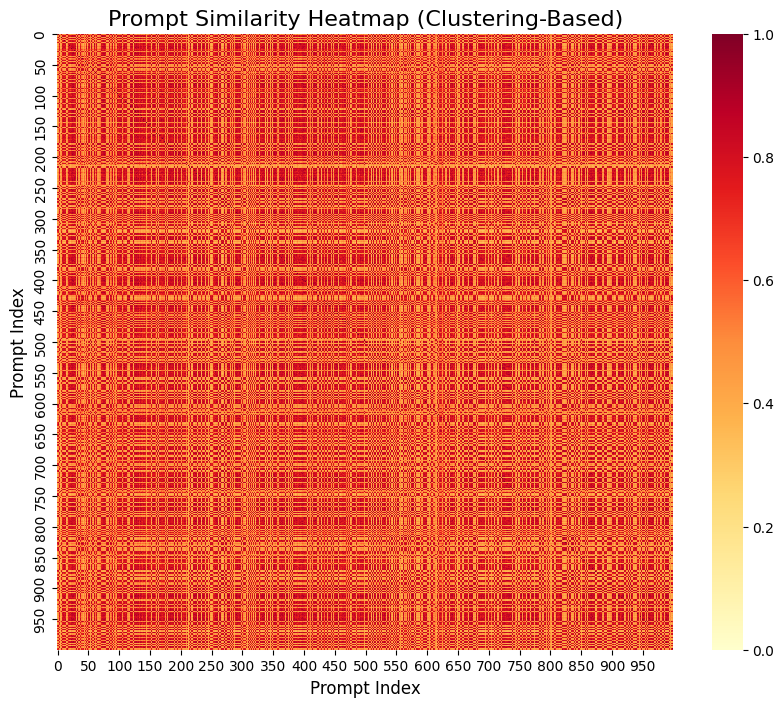

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置画布大小
plt.figure(figsize=(10, 8))

# 绘制热力图
sns.heatmap(
    similarity_matrix,
    cmap="YlOrRd",  # 颜色映射
    vmin=0,         # 最小值
    vmax=1,         # 最大值
    square=True,    # 使每个单元格为正方形
    xticklabels=50, # 每 50 个标签显示一个
    yticklabels=50  # 每 50 个标签显示一个
)

# 添加标题和标签
plt.title("Prompt Similarity Heatmap (Clustering-Based)", fontsize=16)
plt.xlabel("Prompt Index", fontsize=12)
plt.ylabel("Prompt Index", fontsize=12)

# 显示图形
plt.show()

In [6]:
import torch
import timeit

# 原始函数
def find_value_indices_original(tensor, max_val):
    result = []
    for val in range(max_val):
        mask = (tensor == val)
        indices = torch.nonzero(mask, as_tuple=True)[0]
        result.append(indices)
    return result

# 优化后的函数
def find_value_indices_optimized(tensor, max_val):
    mask = tensor.unsqueeze(-1) == torch.arange(max_val, device=tensor.device)
    return [torch.where(mask[:, i])[0] for i in range(max_val)]

# 测试数据
def generate_test_data(size, max_val):
    return torch.randint(0, max_val, (size,)), max_val

# 测试函数性能
def test_performance():
    sizes = [1000, 10000, 100000]  # 测试不同大小的张量
    max_val = 10  # 假设最大值为 10
    repeat = 100  # 每个函数运行 100 次取平均

    for size in sizes:
        tensor, max_val = generate_test_data(size, max_val)
        
        # 测试原始函数
        time_original = timeit.timeit(
            lambda: find_value_indices_original(tensor, max_val),
            number=repeat
        ) / repeat

        # 测试优化后的函数
        time_optimized = timeit.timeit(
            lambda: find_value_indices_optimized(tensor, max_val),
            number=repeat
        ) / repeat

        print(f"Tensor size: {size}")
        print(f"Original function: {time_original:.6f} seconds per call")
        print(f"Optimized function: {time_optimized:.6f} seconds per call")
        print(f"Speedup: {time_original / time_optimized:.2f}x")
        print("---")

# 运行性能测试
test_performance()

Tensor size: 1000
Original function: 0.000217 seconds per call
Optimized function: 0.000170 seconds per call
Speedup: 1.28x
---
Tensor size: 10000
Original function: 0.000518 seconds per call
Optimized function: 0.001424 seconds per call
Speedup: 0.36x
---
Tensor size: 100000
Original function: 0.002807 seconds per call
Optimized function: 0.003177 seconds per call
Speedup: 0.88x
---


In [3]:
import torch

# 创建一个张量
x = torch.randn(1000000, 512).cuda()

# 测量 index_select 的执行时间
%timeit x.index_select(0, torch.randint(0, 1000000, (1024,)).cuda())

# 测量直接索引的执行时间
%timeit x[torch.randint(0, 1000000, (1024,)).cuda()]

41.9 µs ± 1.4 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
45.3 µs ± 2.69 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Running on CUDA

Benchmarking E=8, L=1024, sparsity=0.1
Loop      : 0.3277 ms
Vectorized: 0.1374 ms
Optimized : 0.2708 ms

Benchmarking E=16, L=2048, sparsity=0.05
Loop      : 0.6267 ms
Vectorized: 0.1415 ms
Optimized : 0.2782 ms

Benchmarking E=32, L=8192, sparsity=0.05
Loop      : 1.3728 ms
Vectorized: 0.1551 ms
Optimized : 0.4596 ms

Benchmarking E=32, L=8192, sparsity=0.03125
Loop      : 1.3864 ms
Vectorized: 0.1551 ms
Optimized : 0.3543 ms

Benchmarking E=32, L=8192, sparsity=0
Loop      : 1.3777 ms
Vectorized: 0.1568 ms
Optimized : 0.2713 ms

Benchmarking E=32, L=8192, sparsity=1
Loop      : 1.3883 ms
Vectorized: 0.1548 ms
Optimized : 0.4593 ms


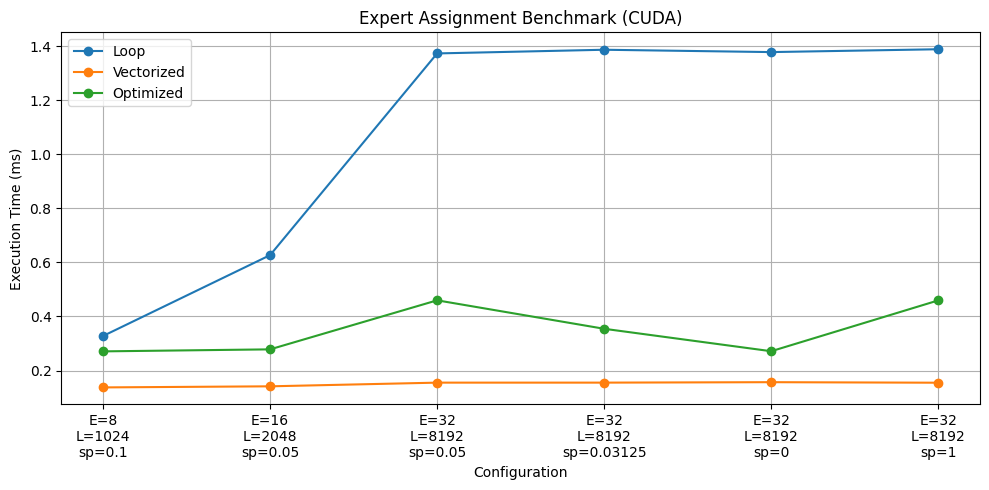

In [18]:
import torch
import timeit
import matplotlib.pyplot as plt
from typing import List

def method_loop(mask: torch.Tensor) -> List[torch.Tensor]:
    """基础循环方法"""
    expert_to_indices = []
    for expert_idx in range(mask.size(0)):
        positions = mask[expert_idx].nonzero(as_tuple=True)[0]
        expert_to_indices.append(positions)
    return expert_to_indices

def method_vectorized(mask: torch.Tensor) -> List[torch.Tensor]:
    """向量化split方法"""
    all_indices = mask.nonzero()
    if all_indices.size(0) == 0:
        return [torch.empty(0, dtype=torch.long, device=mask.device) for _ in range(mask.size(0))]
    return torch.split(all_indices[:,1], mask.sum(dim=1).tolist())

def method_optimized(mask: torch.Tensor) -> List[torch.Tensor]:
    """unique+split优化方法"""
    expert_ids, positions = mask.nonzero(as_tuple=True)
    if expert_ids.numel() == 0:
        return [torch.empty(0, dtype=torch.long, device=mask.device) for _ in range(mask.size(0))]
    
    sorted_ids, sort_idx = expert_ids.sort()
    counts = torch.bincount(sorted_ids, minlength=mask.size(0))
    return torch.split(positions[sort_idx], counts.tolist())

def generate_mask(E: int, L: int, sparsity: float, device='cpu') -> torch.Tensor:
    """生成指定稀疏度的随机掩码"""
    mask = torch.rand(E, L, device=device) < sparsity
    # 确保每行至少有一个非零元素
    mask[torch.arange(E, device=device), torch.randint(0, L, (E,), device=device)] = True
    return mask

def compare_results(ref: List[torch.Tensor], test: List[torch.Tensor]) -> bool:
    """安全的结果比较方法"""
    if len(ref) != len(test):
        return False
    for r, t in zip(ref, test):
        if r.device != t.device:
            t = t.to(r.device)
        if not torch.equal(r, t):
            return False
    return True

def run_benchmark(configs):
    # 测试配置
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Running on {device.upper()}")
    

    methods = {
        'Loop': method_loop,
        'Vectorized': method_vectorized,
        'Optimized': method_optimized
    }
    
    results = {name: [] for name in methods}
    
    for config in configs:
        print(f"\nBenchmarking E={config['E']}, L={config['L']}, sparsity={config['sparsity']}")
        mask = generate_mask(config['E'], config['L'], config['sparsity'], device)
        
        # 预热和同步
        _ = method_optimized(mask)
        if device == 'cuda':
            torch.cuda.synchronize()
        
        # 获取参考结果
        ref_result = method_loop(mask.cpu())
        
        for name, method in methods.items():
            try:
                # 计时
                def wrapper():
                    if device == 'cuda':
                        torch.cuda.synchronize()
                    return method(mask)
                
                times = timeit.repeat(wrapper, number=10, repeat=3)
                avg_time = sum(times) / len(times) / 10 * 1000  # 平均毫秒时间
                
                # 验证结果
                test_result = method(mask)
                if not compare_results(ref_result, test_result):
                    print(f"Validation failed for {name}!")
                    print("Reference:", [r.shape for r in ref_result])
                    print("Test:", [t.shape for t in test_result])
                    continue
                
                results[name].append(avg_time)
                print(f"{name:<10}: {avg_time:.4f} ms")
            
            except Exception as e:
                print(f"Error in {name}: {str(e)}")
                results[name].append(float('nan'))
    
    # 可视化结果
    plt.figure(figsize=(10, 5))
    x_labels = [f"E={c['E']}\nL={c['L']}\nsp={c['sparsity']}" for c in configs]
    
    for name, times in results.items():
        plt.plot(x_labels, times, marker='o', label=name)
    
    plt.title(f"Expert Assignment Benchmark ({device.upper()})")
    plt.ylabel("Execution Time (ms)")
    plt.xlabel("Configuration")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"expert_assignment_benchmark_{device}.png")
    plt.show()

if __name__ == "__main__":
    torch.manual_seed(42)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(42)

    configs = [
        {'E': 8, 'L': 1024, 'sparsity': 0.1},
        {'E': 16, 'L': 2048, 'sparsity': 0.05},
        {'E': 32, 'L': 256*32, 'sparsity': 0.05},
        {'E': 32, 'L': 256*32, 'sparsity': 1/32},
        {'E': 32, 'L': 256*32, 'sparsity': 0},
        {'E': 32, 'L': 256*32, 'sparsity': 1},
    ]

    run_benchmark(configs)

In [16]:
def method_vectorized(mask: torch.Tensor) -> List[torch.Tensor]:
    """向量化split方法"""
    all_indices = mask.nonzero()
    if all_indices.size(0) == 0:
        return [torch.empty(0, dtype=torch.long, device=mask.device) for _ in range(mask.size(0))]
    return torch.split(all_indices[:,1], mask.sum(dim=1).tolist())
config = configs[0]
mask = generate_mask(config['E'], config['L'], config['sparsity'])
len(method_vectorized(mask))

8